<a href="https://colab.research.google.com/github/yeseul106/Data_Mining/blob/main/Midterm_Problem6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# subway.csv 파일 읽어오기
subway = pd.read_csv('/content/drive/MyDrive/강의/데이터마이닝 수업/subway.csv', encoding='cp949')
print(subway.shape)
subway

(23, 2)


,Year,Line 3
0,2016,287363289
1,2015,286360778
2,2014,293775202
3,2013,289692822
4,2012,286036938
5,2011,282997903
6,2010,275466721
7,2009,257501239
8,2008,256547773
9,2007,256172707


In [ ]:
# 2000년, 2001년, 2002년 데이터가 존재하지 않음.
# 전체적인 데이터 분석을 위해 scatter 그래프 그려보기

year = np.array(subway["Year"])
line_3 = np.array(subway["Line 3"])
# 잘 되었는지 확인
print(len(year))
print(len(line_3))

23
23


In [ ]:
print(year[4], line_3[4])

2012 286036938


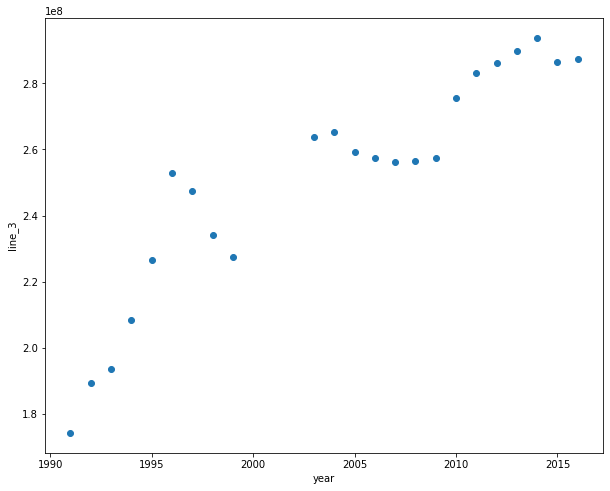

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(year, line_3)
plt.xlabel('year')
plt.ylabel('line_3')
plt.show()

In [ ]:
# linearRegression 클래스를 이용하여 2000, 2001, 2002년도의 빠진 데이터를 예측
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 두 리스트의 shape을 바꿔야함
year_arr = year.reshape(-1,1)
line_3_arr = line_3.reshape(-1,1)

print(year_arr.shape)
print(line_3_arr.shape)

(23, 1)
(23, 1)


In [ ]:
# 선형 회귀 모델을 훈련
lr.fit(year_arr,line_3_arr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 2000년의 데이터 예측
print("2000년의 lne_3 : ", lr.predict([[2000]]))
print("2001년의 lne_3 : ", lr.predict([[2001]]))
print("2002년의 lne_3 : ", lr.predict([[2002]]))

2000년의 lne_3 :  [[2.36131195e+08]]
2001년의 lne_3 :  [[2.40004786e+08]]
2002년의 lne_3 :  [[2.43878377e+08]]


In [ ]:
print(lr.coef_, lr.intercept_)

[[3873590.7978492]] [-7.5110504e+09]


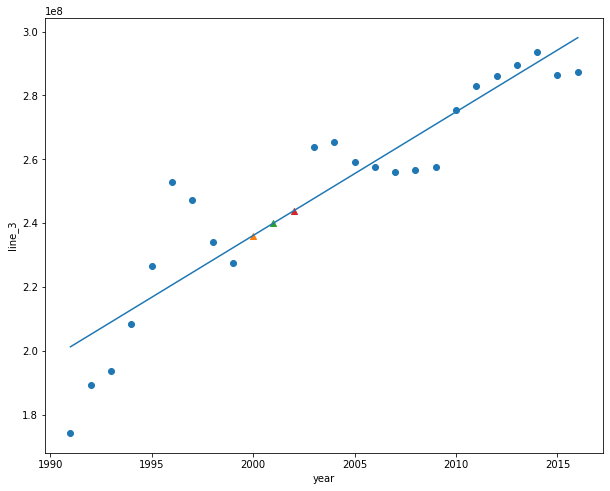

In [ ]:
plt.figure(figsize=(10,8))
# 다시 한번 산점도를 그려보자
plt.scatter(year,line_3)

# 선형 그래프도 그려보자
plt.plot([1991,2016], [1991*lr.coef_[0]+lr.intercept_, 2016*lr.coef_[0]+lr.intercept_])

# 2000년, 2001년, 20002년 데이터

plt.scatter(2000,lr.predict([[2000]]),marker='^')
plt.scatter(2001,lr.predict([[2001]]),marker='^')
plt.scatter(2002,lr.predict([[2002]]),marker='^')
plt.xlabel('year')
plt.ylabel('line_3')
plt.show()